In [669]:
import pandas as pd
import numpy as np
filename="F:\API_project\Project_challenge-machine-learning-api-deployment\housing4.1csv.csv"
df = pd.read_csv(filename)
df.head(5)

,Title,Location,Price,Area,Number_of_Rooms,Furnished,Kitchen type,Status,Garden surface,Swimming Pool
0,Villa for sale,Prins Karellaan 13,"€ 1,650",4 bedrooms | 499 m²,4 bedrooms,No,Hyper equipped,As new,450 m²,No
1,House for sale,Lembergsesteenweg 67 Box lot 2,"€ 419,000",3 bedrooms | 188 m²,3 bedrooms,No,Hyper equipped,As new,330 m²,No
2,House for sale,Lembergsesteenweg 67 Box lot 1,"€ 459,000",3 bedrooms | 164 m²,3 bedrooms,No,Hyper equipped,As new,341 m²,No
3,House for sale,Ruelle Hierby 17,"€ 149,000",2 bedrooms | 134 m²,2 bedrooms,No,Installed,Good,300 m²,No
4,House for sale,Rue Petite Voie 176,"€ 149,000",5 bedrooms | 198 m²,5 bedrooms,No,Semi equipped,To be done up,147 m²,No


In [670]:
print("There are {} rows of data".format(len(df)))

There are 10187 rows of data


In [671]:
df['Number_of_Rooms'] = df["Number_of_Rooms"].str.replace("bedrooms","")
df['Number_of_Rooms'] = df["Number_of_Rooms"].str.replace("bedroom","")
df['Number_of_Rooms'] = df["Number_of_Rooms"].str.replace("bathrooms","")
df['Number_of_Rooms'] = df["Number_of_Rooms"].str.replace("bathroom","")
df = df[df['Number_of_Rooms'].str.contains('sq')==False]
df['Number_of_Rooms'] = df['Number_of_Rooms'].str.split("-", expand=True)[0]
df['Number_of_Rooms'] = pd.to_numeric(df['Number_of_Rooms'])
df.head()
a = df['Number_of_Rooms'].unique() 
print(a)


[ 4  3  2  5  6  7  1  8 10 17 94 13 11 12  9 14 15 16 20 22 23 28 21 18
 30 50 39 36]


In [672]:
print("There are {} rows of data".format(len(df)))

There are 10101 rows of data


In [673]:
#cleaning Price
df['Price'] = df["Price"].map(lambda x: str(x)[1:])
df['Price']=df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'])
df.head()

,Title,Location,Price,Area,Number_of_Rooms,Furnished,Kitchen type,Status,Garden surface,Swimming Pool
0,Villa for sale,Prins Karellaan 13,1650,4 bedrooms | 499 m²,4,No,Hyper equipped,As new,450 m²,No
1,House for sale,Lembergsesteenweg 67 Box lot 2,419000,3 bedrooms | 188 m²,3,No,Hyper equipped,As new,330 m²,No
2,House for sale,Lembergsesteenweg 67 Box lot 1,459000,3 bedrooms | 164 m²,3,No,Hyper equipped,As new,341 m²,No
3,House for sale,Ruelle Hierby 17,149000,2 bedrooms | 134 m²,2,No,Installed,Good,300 m²,No
4,House for sale,Rue Petite Voie 176,149000,5 bedrooms | 198 m²,5,No,Semi equipped,To be done up,147 m²,No


In [674]:
a = df['Price'].unique() 
print(a)

[  1650 419000 459000 ... 357260 459990 667000]


In [675]:
# cleaning Area
df.Area = df.Area.str.split('|').str.get(-1)
df['Area'] = df["Area"].map(lambda x: str(x)[:-3])
df['Area']=df['Area'].str.replace(',','')
df = df[df['Area'].str.contains('bed')==False]
df = df[df['Area'].str.contains('N')==False]
df.head()

,Title,Location,Price,Area,Number_of_Rooms,Furnished,Kitchen type,Status,Garden surface,Swimming Pool
0,Villa for sale,Prins Karellaan 13,1650,499,4,No,Hyper equipped,As new,450 m²,No
1,House for sale,Lembergsesteenweg 67 Box lot 2,419000,188,3,No,Hyper equipped,As new,330 m²,No
2,House for sale,Lembergsesteenweg 67 Box lot 1,459000,164,3,No,Hyper equipped,As new,341 m²,No
3,House for sale,Ruelle Hierby 17,149000,134,2,No,Installed,Good,300 m²,No
4,House for sale,Rue Petite Voie 176,149000,198,5,No,Semi equipped,To be done up,147 m²,No


In [676]:
print("There are {} rows of data".format(len(df)))

There are 9149 rows of data


In [677]:
df['AreaFrom'] = df['Area'].str.split("-", expand=True)[0]
df['AreaTo'] = df['Area'].str.split("-", expand=True)[1]
df['AreaFrom'] = pd.to_numeric(df['AreaFrom'])
df['AreaTo'] = pd.to_numeric(df['AreaTo'])
df['Area'] = df[['AreaFrom', 'AreaTo']].mean(axis=1)

In [ ]:
a = df['Area'].unique() 
#a = df['Area'].mean() 
print(a)

In [679]:
# Garden surface Cleaning
df['Garden surface'] = df["Garden surface"].map(lambda x: str(x)[:-3])
df.head()

,Title,Location,Price,Area,Number_of_Rooms,Furnished,Kitchen type,Status,Garden surface,Swimming Pool,AreaFrom,AreaTo
0,Villa for sale,Prins Karellaan 13,1650,499.0,4,No,Hyper equipped,As new,450,No,499,NaN
1,House for sale,Lembergsesteenweg 67 Box lot 2,419000,188.0,3,No,Hyper equipped,As new,330,No,188,NaN
2,House for sale,Lembergsesteenweg 67 Box lot 1,459000,164.0,3,No,Hyper equipped,As new,341,No,164,NaN
3,House for sale,Ruelle Hierby 17,149000,134.0,2,No,Installed,Good,300,No,134,NaN
4,House for sale,Rue Petite Voie 176,149000,198.0,5,No,Semi equipped,To be done up,147,No,198,NaN


In [680]:

df['Garden surface']=df['Garden surface'].str.replace(',','')
df = df[df['Garden surface'].str.contains('sq')==False]
df['Garden surface'] = pd.to_numeric(df['Garden surface'])
df.head()

,Title,Location,Price,Area,Number_of_Rooms,Furnished,Kitchen type,Status,Garden surface,Swimming Pool,AreaFrom,AreaTo
0,Villa for sale,Prins Karellaan 13,1650,499.0,4,No,Hyper equipped,As new,450,No,499,NaN
1,House for sale,Lembergsesteenweg 67 Box lot 2,419000,188.0,3,No,Hyper equipped,As new,330,No,188,NaN
2,House for sale,Lembergsesteenweg 67 Box lot 1,459000,164.0,3,No,Hyper equipped,As new,341,No,164,NaN
3,House for sale,Ruelle Hierby 17,149000,134.0,2,No,Installed,Good,300,No,134,NaN
4,House for sale,Rue Petite Voie 176,149000,198.0,5,No,Semi equipped,To be done up,147,No,198,NaN


In [ ]:
a = df['Garden surface'].unique() 
#a = df['Area'].mean() 
print(a)

In [682]:
print("There are {} rows of data".format(len(df)))

There are 9034 rows of data


In [655]:
a = df['Status'].unique() 
#a = df['Area'].mean() 
print(a)

['As new' 'Good' 'To be done up' 'To renovate' 'Just renovated'
 'To restore']


In [683]:
print("There are {} rows of data".format(len(df)))
df.drop_duplicates(inplace=True) #remove duplicate/1097 removed
print("There are {} rows of data".format(len(df)))

There are 9034 rows of data
There are 8055 rows of data


In [690]:
df1 = df[df['Status'].str.contains('As new')==True]
df2 = df[df['Status'].str.contains('Good')==True]
df3 = df[df['Status'].str.contains('Just renovated')==True]

df4 = df[df['Status'].str.contains('To be done up')==True]
df5 = df[df['Status'].str.contains('To renovate')==True]
df6 = df[df['Status'].str.contains('To restore')==True]

In [691]:
print("There are {} rows of data".format(len(df1)))
print("There are {} rows of data".format(len(df2)))
print("There are {} rows of data".format(len(df3)))
print("There are {} rows of data".format(len(df4)))
print("There are {} rows of data".format(len(df5)))
print("There are {} rows of data".format(len(df6)))

There are 1712 rows of data
There are 3030 rows of data
There are 439 rows of data
There are 1044 rows of data
There are 1080 rows of data
There are 53 rows of data


In [658]:
# To check how many rows of each attribute are NaN
df.isna().any(axis=0)

Title              False
Location           False
Price              False
Area               False
Number_of_Rooms    False
Furnished          False
Kitchen type       False
Status             False
Garden surface     False
Swimming Pool      False
AreaFrom           False
AreaTo              True
dtype: bool

In [610]:

missing_values_count = df.isnull().any(axis=0).sum()
print(missing_values_count)

1


In [611]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,Title,Location,Price,Area,Number_of_Rooms,Furnished,Kitchen type,Status,Garden surface,Swimming Pool,AreaFrom
0,Villa for sale,Prins Karellaan 13,1650,499.0,4,No,Hyper equipped,As new,450,No,499
1,House for sale,Lembergsesteenweg 67 Box lot 2,419000,188.0,3,No,Hyper equipped,As new,330,No,188
2,House for sale,Lembergsesteenweg 67 Box lot 1,459000,164.0,3,No,Hyper equipped,As new,341,No,164
3,House for sale,Ruelle Hierby 17,149000,134.0,2,No,Installed,Good,300,No,134
4,House for sale,Rue Petite Voie 176,149000,198.0,5,No,Semi equipped,To be done up,147,No,198


In [612]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0010267783801544276

In [613]:
#Print dtype of every attribute
result = df.dtypes
print(result)

Title               object
Location            object
Price                int64
Area               float64
Number_of_Rooms     object
Furnished           object
Kitchen type        object
Status              object
Garden surface       int64
Swimming Pool       object
AreaFrom             int64
AreaTo             float64
dtype: object


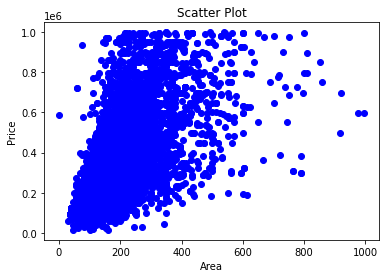

In [689]:
import matplotlib.pyplot as plt
ax = plt.gca()
X1 = np.array(df.Area)

y_target= np.array(df.Price)
plt.scatter(X1, y_target, color="blue")
#plt.plot(predictions)
plt.title("Scatter Plot")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

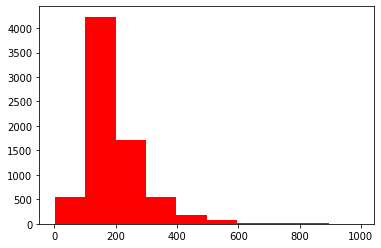

In [665]:
y_target= np.array(df22.Price)
plt.hist(y_target, color="blue")

y_target= np.array(df22.Area)
plt.hist(y_target, color="red")
plt.show()

In [686]:
df = df[df['Price']>10000]
df = df[df['Area']<1000]

In [688]:
len(df)


7358

In [692]:
df_cleaned = df.to_csv('data_cleaned.csv') 